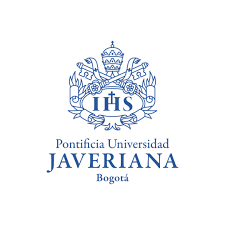
***Pontificia Universidad Javeriana***

##Procesamiento de Datos a Gran Escala
**Autor**: **[*Diego Alejandro Martìnez Oviedo*](https://github.com/MandoD1/Procesamiento-de-datos-a-gran-escala)**

**Fecha**: 5/5/2025

---

***Objetivo***: Uso de SQL como motor de Consultas sobre DataFrame Spark.

---

Proporciona una abstracción de programación denominada DataFrames y también puede actuar como motor de consulta SQL distribuido. Permite ejecutar consultas Hadoop Hive no modificadas hasta 100 veces más rápido en implementaciones y datos existentes. También proporciona una potente integración con el resto del ecosistema Spark (por ejemplo, integrando el procesamiento de consultas SQL con MLib).

Spark SQL aporta soporte nativo para SQL a Spark y agiliza el proceso de consulta de datos almacenados tanto en RDD como en fuentes externas. Spark SQL difumina convenientemente las líneas entre RDDs y tablas relacionales. Spark SQL permite:

- Importar datos relacionales de archivos Parquet y tablas Hive
- Ejecutar consultas SQL sobre datos importados y RDDs existentes
- Escribir fácilmente RDDs en tablas Hive o archivos Parquet.

Spark SQL también incluye un optimizador basado en costes, almacenamiento en columnas y generación de código para agilizar las consultas. Al mismo tiempo, escala a miles de nodos y consultas de varias horas utilizando el motor Spark, que proporciona una tolerancia total a fallos a mitad de consulta, sin tener que preocuparse de utilizar un motor diferente para los datos históricos.

____________________________________________________

**1.- Crear sessión PySpark SQL**

In [1]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()

In [ ]:
#se crea una SparkSession, que es el punto de entrada principal para trabajar con Spark cuando se usa DataFrames y/o SQL

**2.-Crear DataFrame Spark:**
- Al menos 15 registros: nombres y edades entre (10 y 70 años)**
- Mostrar dataframe


In [24]:
df00 = spark.createDataFrame(
        [
            ("diego", 22),
            ("alejandro", 31),
            ("Julian", 21),
            ("Andrey", 41),
            ("Paula", 19),
            ("Andrea", 26),
            ("Maria", 33),
            ("Fernanda", 21),
            ("Juan", 68),
            ("Jose", 45),
            ("David", 55),
            ("Alfonso", 19),
            ("Dana", 20),
            ("Samuel", 12),
            ("Pablo", 30),
        ],
        ["Nombre", "Edad"],
)

In [ ]:
#se crea una base de datos bàsica

**3.- Agregue una nueva columna "Etapa":**
- Niño: menores de 12 años
- Adolescente: menores de 19 años
- Adulto: mayor que 19 años
- Mostrar dataframe



In [25]:

df01 = df00.withColumn(
    "etapa",
    when(col("Edad") <= 12, "niño").when(col("Edad") <= 19, "adolescente").otherwise("adulto"),
)
df01.show()

+---------+----+-----------+
|   Nombre|Edad|      etapa|
+---------+----+-----------+
|    diego|  22|     adulto|
|alejandro|  31|     adulto|
|   Julian|  21|     adulto|
|   Andrey|  41|     adulto|
|    Paula|  19|adolescente|
|   Andrea|  26|     adulto|
|    Maria|  33|     adulto|
| Fernanda|  21|     adulto|
|     Juan|  68|     adulto|
|     Jose|  45|     adulto|
|    David|  55|     adulto|
|  Alfonso|  19|adolescente|
|     Dana|  20|     adulto|
|   Samuel|  12|       niño|
|    Pablo|  30|     adulto|
+---------+----+-----------+



In [ ]:
#se añade nueva columna para poder tener un paràmetro de bùsqueda en la base de datos

**4.- Filtre los datos que son solo 'Adolescentes y Adultos'**

In [26]:
df01.where(col("etapa").isin(["adolescente", "adulto"])).show()

+---------+----+-----------+
|   Nombre|Edad|      etapa|
+---------+----+-----------+
|    diego|  22|     adulto|
|alejandro|  31|     adulto|
|   Julian|  21|     adulto|
|   Andrey|  41|     adulto|
|    Paula|  19|adolescente|
|   Andrea|  26|     adulto|
|    Maria|  33|     adulto|
| Fernanda|  21|     adulto|
|     Juan|  68|     adulto|
|     Jose|  45|     adulto|
|    David|  55|     adulto|
|  Alfonso|  19|adolescente|
|     Dana|  20|     adulto|
|    Pablo|  30|     adulto|
+---------+----+-----------+



In [ ]:
#se hace una filtraciòn

### Consultas al Dataframe por SQL

**5.- Consulte el promedio de la columna Edad**


In [27]:
spark.sql("select avg(Edad) from {df01}", df01=df01).show()

+------------------+
|         avg(Edad)|
+------------------+
|30.866666666666667|
+------------------+



In [ ]:
#se hace un promedio general de todas las edades

**6.- Consulte el promedio de la columna Edad por Etapa**




In [28]:
spark.sql("select etapa, avg(Edad) from {df01} group by etapa", df01=df01).show()

+-----------+------------------+
|      etapa|         avg(Edad)|
+-----------+------------------+
|     adulto|34.416666666666664|
|adolescente|              19.0|
|       niño|              12.0|
+-----------+------------------+



In [ ]:
#se hace un promedio por grupo de edad

**7.- Persistencia: crear un tabla para ser facilmente accesible por el API SQL**

- Crear la tabla
- Mostrar la tabla creada
- Insertar al menos 4 nuevos registros
- Mostrar nueva tabla


In [29]:
df01.write.saveAsTable("Poblacion")

spark.sql("select * from Poblacion").show()

spark.sql("INSERT INTO Poblacion VALUES ('Oviedo', 20, 'adulto')")

AnalysisException: [TABLE_OR_VIEW_ALREADY_EXISTS] Cannot create table or view `spark_catalog`.`default`.`poblacion` because it already exists.
Choose a different name, drop or replace the existing object, or add the IF NOT EXISTS clause to tolerate pre-existing objects.

**8.- Consulte en la tabla los adolescentes:**


In [33]:
spark.sql("select * from Poblacion where etapa='adolescente'").show()

+-------+----+-----------+
| Nombre|Edad|      etapa|
+-------+----+-----------+
|Alfonso|  19|adolescente|
|  Paula|  19|adolescente|
+-------+----+-----------+



In [ ]:
#se hace una consulta sql

## RDD Spark

**9.- Carge el Fichero [texto.txt](https://github.com/corredor-john/ExploratoryDataAnalisys/blob/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt) para ser leido por el contexto SPARK**

- Descargue el fichero
- Crear el contexto y cargue el fichero



In [42]:
fichero = spark.sparkContext.textFile("SMSSpamCollection.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [43]:
counts.take(10)

[('ham\tGo', 4),
 ('jurong', 1),
 ('point,', 1),
 ('world', 17),
 ('la', 2),
 ('buffet...', 1),
 ('Cine', 1),
 ('got', 204),
 ('wat...', 12),
 ('ham\tOk', 86)]

## **10.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

-
-
...

* Fue util el taller, dado que mostrò nuevas formas de hacer funciones ya conocidas, pero de manera màs simplificada
* Fue un buen ejemplo de como manejar dataframes de spark
* Mostrò la forma de utilizar funciones SQL dentro de un dataframe spark
* Permitiò observar un ejemplo de RDD en spark
* Buen ejercicio en relaciòn trabajo/tiempo para su realizaciòn